<a href="https://colab.research.google.com/github/nilesh3030/Stroke-Prediction/blob/main/EDA_2021_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
import dateutil.parser


pd.set_option ('display.max_columns', None)
pd.set_option ('display.max_rows', None)

In [ ]:
df_2021 = pd.read_csv('/content/drive/MyDrive/Stroke_Prediction/Data/Stroke_clean_2021.csv', low_memory = False)
df_2022 = pd.read_csv('/content/drive/MyDrive/Stroke_Prediction/Data/Stroke_clean_2022.csv', low_memory = False)

In [ ]:
print(df_2021.shape)
print(df_2022.shape)

In [ ]:
frames = [df_2021, df_2022]

df = pd.concat(frames)
print(df.shape)
print(df_2021.shape[0] + df_2022.shape[0])

In [ ]:
df.columns

In [ ]:
df.age.value_counts()

In [ ]:
indexAge = df[ (df['age'] == 'male') | (df['age'] == 'female') ].index
df.drop(indexAge , inplace=True)

In [ ]:
final_data = df.drop(['Unnamed: 0'], axis =1)
print(final_data.shape)
final_data.head()

In [ ]:
#treating the datetime variables

convert_dict = {'call_d': str,
                'call_t': str,
                'age' : int}
 
final_data = final_data.astype(convert_dict)

final_data["Datetime"] = final_data["call_d"] + final_data["call_t"]



def convert_datetime(row):
  if (len(row['Datetime']) == 11 or len(row['Datetime']) == 12) and row['Datetime'].isnumeric():
    try:
      return(pd.to_datetime(row['Datetime'], format = '%Y%m%d%H%M'))
    except:
      return(np.nan)


final_data['Datetime_converted'] = final_data.apply(lambda row: convert_datetime(row), axis=1)

In [ ]:
final_data['Weekday'] = final_data['Datetime_converted'].dt.dayofweek
final_data['Month'] = final_data['Datetime_converted'].dt.month
final_data['Year'] = final_data['Datetime_converted'].dt.year
final_data['Hour'] = final_data['Datetime_converted'].dt.hour
final_data['Minute'] = final_data['Datetime_converted'].dt.minute

In [ ]:
final_data.head()

In [ ]:
### Cases across months and year
cases_my = final_data.groupby(['Year', 'Month'])['cv2_cphss'].aggregate(['count'])
cases_my

Therer are some junk values in the year column so we will drop these values and then proceed ahead

In [ ]:
vars = [2021.0, 2022.0]
final_data = final_data.loc[final_data['Year'].isin(vars)]

In [ ]:
final_data.shape

In [ ]:
### we will examine the values of the target variables and remove the junk records
final_data.cv2_cphss.value_counts()

N and F can be marked as neagtive and Y can be marked as positive and we will change these into 1 and zero where 1 means positive case and zero means negative

In [ ]:
target_vars = ['positive', 'Y', 'negative', 'N', 'F']

final_data = final_data.loc[final_data['cv2_cphss'].isin(target_vars)]

#Replacing the target varibles with 0, 1 
final_data['cv2_cphss'].replace(target_vars , [1, 1, 0, 0, 0], inplace=True)

In [ ]:
final_data.cv2_cphss.value_counts()

In [ ]:
48318/(48319+60987)

In [ ]:
# we will replace the junk values with the nan
replace_values = {999.0 : np.nan, 999.9 : np.nan, 943.0 : np.nan, 9999.0 : np.nan, 7777.0 : np.nan, 6666.0 : np.nan, 770.0 : np.nan} 
final_data = final_data.replace(replace_values)

In [ ]:
# 5-number summary
final_data.describe()

In [ ]:
replace_values = {795.0 : np.nan, 983.0 : np.nan, 9996.0 : np.nan, 960.0 : np.nan, 777.0 : np.nan, 977.0 : np.nan, 666.0 : np.nan} 
final_data = final_data.replace(replace_values)

In [ ]:
# SPO2 can never be more than 100 so we will mark all the values above 100 as NaN
final_data[final_data.spo2_1 > 100] = np.nan

In [ ]:
null_variables = round((final_data.isna().sum()/len(final_data))*100,2)
null_variables

In [ ]:
def spasm(row):  
    if row['sx1'] == 'Spasm/seizure' or row['sx2'] == 'Spasm/seizure' or row['sx3'] == 'Spasm/seizure' or row['sx4'] == 'Spasm/seizure' or row['sx5'] == 'Spasm/seizure':
        return 1
    return 0

def dizziness(row):  
    if row['sx1'] == 'Dizziness' or row['sx2'] == 'Dizziness' or row['sx3'] == 'Dizziness' or row['sx4'] == 'Dizziness' or row['sx5'] == 'Dizziness':
        return 1
    return 0

def faint(row):  
    if row['sx1'] == 'faint' or row['sx2'] == 'faint' or row['sx3'] == 'faint' or row['sx4'] == 'faint' or row['sx5'] == 'faint':
        return 1
    return 0

def consciousness(row):  
    if row['sx1'] == 'Consciousness' or row['sx2'] == 'Consciousness' or row['sx3'] == 'Consciousness' or row['sx4'] == 'Consciousness' or row['sx5'] == 'Consciousness':
        return 1
    return 0

def paralysis(row):  
    if row['sx1'] == 'paralysis' or row['sx2'] == 'paralysis' or row['sx3'] == 'paralysis' or row['sx4'] == 'paralysis' or row['sx5'] == 'paralysis':
        return 1
    return 0

final_data['Spasm'] = final_data.apply(lambda row: spasm(row), axis=1)
final_data['Dizziness'] = final_data.apply(lambda row: dizziness(row), axis=1)
final_data['Faint'] = final_data.apply(lambda row: faint(row), axis=1)
final_data['Consciousness'] = final_data.apply(lambda row: consciousness(row), axis=1)
final_data['Paralysis'] = final_data.apply(lambda row: paralysis(row), axis=1)

In [ ]:
final_data = final_data.drop(['sx1', 'sx2', 'sx3', 'sx4', 'sx5'], axis=1)

null_variables = round((final_data.isna().sum()/len(final_data))*100,2)
null_variables

# EDA (Charts for categorical and numerical features)

In [ ]:
columns = final_data.columns
num_cols = final_data._get_numeric_data().columns
cat_cols = list(set(columns) - set(num_cols))
print(num_cols)
print(cat_cols)

In [ ]:
num_df = final_data[num_cols]
num_df = num_df.dropna()
corrMatrix = num_df.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corrMatrix, annot=True)

plt.show()

In [ ]:
for column in num_cols:
  # An "interface" to matplotlib.axes.Axes.hist() method
  n, bins, patches = plt.hist(x=num_df[column], bins='auto', color='#0504aa',
                              alpha=0.7, rwidth=0.85)
  plt.grid(axis='y', alpha=0.75)
  plt.xlabel(column)
  plt.ylabel('Frequency')
  plt.title('Distibution plot for '+column)
  maxfreq = n.max()
  # Set the range of x-axis

  if (np.percentile(num_df[column], 100) - np.percentile(num_df[column], 98)) > 100:
    plt.xlim(np.percentile(num_df[column], 0), np.percentile(num_df[column], 95))
  else:
    plt.xlim(np.percentile(num_df[column], 0), np.percentile(num_df[column], 100))

  # Set the range of y-axis
  plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
  plt.show()

In [ ]:
cat_cols

In [ ]:
import warnings
warnings.filterwarnings("ignore")

for var in ['medical_history', 'cv2_cc', 'stroke', 'cv2_act', 'cv_cc', 'diabetes', 'sex', 'obstacle2', 'cv2_phx_yn',  'triage',  'onset']: #'test1',
  plt.figure(figsize=(25,16))
  sns.countplot(x = var, data = final_data, palette = 'rainbow', hue = 'cv2_cphss')
  plt.title("Bar chart for the "+ var + " separated by the events and non events")

**cv2_cc** seems a good variables to distinguish between stroke vs non-stroke. we can club some of the categories together which have the less counts.

**cv2_act** also looks like an important variable fro making the stroke prediction but there are some junk values so we need to make that as null before proceeding

**cv_cc** also has a major demarkation between stroke vs non-stroke but there are many categories that have negligible counts so we will club all of them together.

**sex** variable has some unknown values which is strange so we would gonna mark them as null and later remove it.

**obstacle** and **cv2_phx_yn** doesn't seems very important so we might not use these in our model.

**Triage** look important as it is able to capture the majority stroke cases under one category. We would club the minority categories under one category.

**onset** has some junk values that would be marked null and treated accordingly.

In [ ]:
group1 = final_data.groupby(['cv2_cc'])['cv2_cphss'].aggregate(['count','sum']).reset_index()
group1['Stroke_rate'] = group1['sum'] / group1['count']
group1

We can see that there are few categories with similar stroke rate than other so we would try and club them together so that they have more number of cases and it would help the ML model to make a better decision. Below image shows the groups
	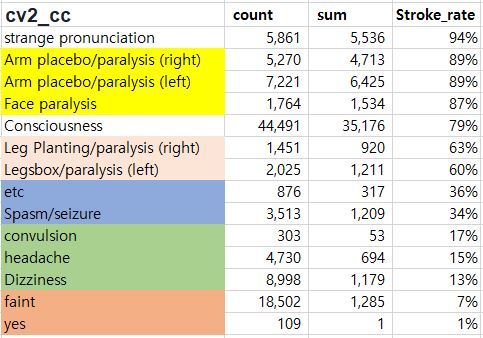

### We will make a copy of the final data and try some models

In [ ]:
model_data_1 = final_data.copy() #shallow copy method so that final data should not get modified

In [ ]:
model_data_1 = model_data_1.dropna()

null_variables = round((model_data_1.isna().sum()/len(model_data_1))*100,2)
print(model_data_1.cv2_cphss.value_counts())
null_variables

In [ ]:
vars_to_drop = ['cv2_cc', 'cv2_phx_yn', 'hypertension', 'diabetes', 'chest_disease',
       'heart_disease', 'tuberculosis', 'hepatitis', 'liver', 'allergy',
       'cancer', 'renal_failure', 'Datetime']

cat_columns = model_data_1.select_dtypes(['object']).columns
cat_columns

In [ ]:
model_data_1[cat_columns] = model_data_1[cat_columns].apply(lambda x: pd.factorize(x)[0])

In [ ]:
def hy_di_disease(row):
    if row['hypertension'] == 1 or row['diabetes'] == 1:
        return 1
    return 0

model_data_1['hy_di_disease'] = model_data_1.apply(lambda row: hy_di_disease(row), axis=1)


## Creating a past disease count variable
model_data_1['Disease_counts'] = model_data_1['hypertension'] + model_data_1['diabetes'] + model_data_1['chest_disease'] + model_data_1['heart_disease'] + model_data_1['tuberculosis'] + model_data_1['hepatitis'] + model_data_1['liver'] + model_data_1['allergy'] + model_data_1['cancer'] + model_data_1['renal_failure']

In [ ]:
model_data_1 = model_data_1.drop(vars_to_drop, axis = 1)
print(model_data_1.shape)

In [ ]:
model_data_1.head()

In [ ]:
model_data_1.to_csv('/content/drive/MyDrive/Stroke_Prediction/Data/Modelling Data/model_data1_2021_2022.csv', index = False)

### We will make a more refined copy of the final data and try some models

In [ ]:
model_data_2 = final_data.copy() #shallow copy method so that final data should not get modified

In [ ]:
vars_to_drop = ['cv2_cc', 'cv2_phx_yn', 'hypertension', 'diabetes', 'chest_disease',
       'heart_disease', 'tuberculosis', 'hepatitis', 'liver', 'allergy',
       'cancer', 'renal_failure', 'Datetime', 'dbp2', 'sbp2', 'pr2', 'rr2', 'bt2', 'spo2_2',
       'onset', 'test1', 'call_d', 'call_t']

cat_columns = model_data_2.select_dtypes(['object']).columns
cat_columns

In [ ]:
model_data_2[cat_columns] = model_data_2[cat_columns].apply(lambda x: pd.factorize(x)[0])

In [ ]:
def hy_di_disease(row):  
    if row['hypertension'] == 1 or row['diabetes'] == 1:
        return 1
    return 0

model_data_2['hy_di_disease'] = model_data_2.apply(lambda row: hy_di_disease(row), axis=1)


## Creating a past disease count variable
model_data_2['Disease_counts'] = model_data_2['hypertension'] + model_data_2['diabetes'] + model_data_2['chest_disease'] + model_data_2['heart_disease'] + model_data_2['tuberculosis'] + model_data_2['hepatitis'] + model_data_2['liver'] + model_data_2['allergy'] + model_data_2['cancer'] + model_data_2['renal_failure']

In [ ]:
model_data_2 = model_data_2.drop(vars_to_drop, axis = 1)
print(model_data_2.shape)

In [ ]:
null_variables = round((model_data_2.isna().sum()/len(model_data_2))*100,2)
print(null_variables)
model_data_2 = model_data_2.dropna()

null_variables = round((model_data_2.isna().sum()/len(model_data_2))*100,2)
print(model_data_2.cv2_cphss.value_counts())
null_variables

In [ ]:
model_data_2.to_csv('/content/drive/MyDrive/Stroke_Prediction/Data/Modelling Data/model_data2_2021_2022.csv', index = False)